In [1]:
import torch
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pickle
import anndata as ad


In [2]:
# data_matrix = '/home/hanyuji/Data/spatial-datasets/data/2018_merFISH_science_hypo_preoptic/count_matrix/merFISH_3D_data_expression.txt'
# data_locations = '/home/hanyuji/Data/spatial-datasets/data/2018_merFISH_science_hypo_preoptic/cell_locations/merFISH_3D_data_cell_locations.txt'


# # Each AnnData object consists of a gene expression matrx and spatial coordinate matrix.
# slice = sc.read_csv(data_matrix,delimiter=' ')
# slice = slice.T     # 交换obs和vars


# slice_loc = np.genfromtxt(data_locations, delimiter = '\t', skip_header=1)

# slice.obsm['spatial'] = slice_loc

# slice.obs['z'] = slice.obsm['spatial'][:,2]

In [3]:
# slice.obs['z'].unique()

In [4]:
# dataset_path = '/home/hanyuji/Data/scNODE_data/h5ad/zebrafish_scNODE0_2000genes_3227cells_12tps.h5ad'
# dataset_path = '/home/hanyuji/Data/scNODE_data/h5ad/drosophila_scNODE2_2000genes_2489cells_11tps.h5ad'
dataset_path = '/home/hanyuji/Workbench/ST/ST_data_check/paste_alignment_cortex/PASTE_align/cortex_macaque1_119slice_subset_1000spot_2000gene_HVG.h5ad'
# dataset_path = '/mnt/sdc/hanyuji/Workbench/ST/ST_data_check/PASTE_demo/paste_alignment.h5ad'


adata = sc.read_h5ad(dataset_path)

In [5]:
timepoints = [ 4, 5, 6]
subset = adata[adata.obs['batch'].isin(timepoints)]
# adata.obs['batch'] = adata.obs['slice']/10

adata = subset

In [6]:
# adata.obs['batch'] = adata.obs['batch'].astype('float')

# adata.obs['batch']

In [9]:
min_dist=0.1
spread=1
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X')
sc.tl.umap(adata, min_dist=min_dist,spread=spread)


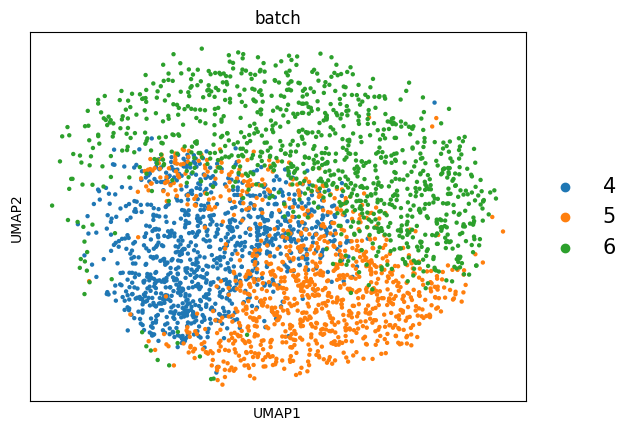

In [10]:

sc.pl.umap(adata, color=['batch'],legend_fontsize=15, ncols=2, save=f'_cortex_neighbors_{min_dist}_{spread}') 
